In [1]:
#Author-Vishal Burman

## Linear Regression implementation from scratch

In [2]:
%matplotlib inline

In [4]:
from mxnet import autograd, nd
import random

In [8]:
# We will set the training set to be 1000*2 and sampling each data point from Gaussian distribution
# epsilon introduced in the equation will be the random noise to account for measurement errors(in features and labels)
# The final equation will be:
# y=Xw+b+epsilon
# Epsilon will also be sampled from Gaussian distribution and standard deviation will be 0.01

In [5]:
def synthetic_data(w, b, num_examples):
    X=nd.random.normal(scale=1, shape=(num_examples, len(w)))
    y=nd.dot(X, w)+b
    y+=nd.random.normal(scale=0.01, shape=y.shape)
    return X, y

In [11]:
true_w=nd.array([2, 3.4])
true_b=4.2
features, labels=synthetic_data(true_w, true_b, 1000)

In [12]:
# Each row in features contain 2-dimensional data point and each row in labels contain 1-dimensional target value

In [14]:
features[0], labels[0]

(
 [ 1.4642214 -1.3058136]
 <NDArray 2 @cpu(0)>, 
 [2.6827433]
 <NDArray 1 @cpu(0)>)

In [15]:
# Genarating a scatter plot using the second feature[:, 1] and labels, we can observe linear correlation between two

In [16]:
import matplotlib.pyplot as plt

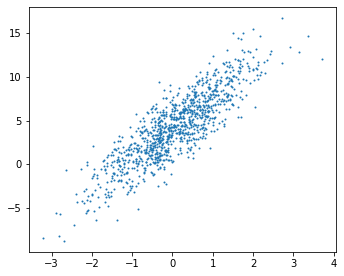

In [18]:
plt.figure(figsize=(5.5, 4.5))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

## Reading data

In [20]:
#We implement the data iter function to take a batch_size, a design matrix containing the features and vector of labels
# The funtion yields batch_size, each containing a tuple of features and labels

In [22]:
# The take funtion returns the corresponding element based on indices

In [21]:
def data_iter(batch_size, features, labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j=nd.array(indices[i: min(i+batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [23]:
# Let's read and print the first batch of data examples

In [25]:
batch_size=10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.50332594  1.3600037 ]
 [ 1.6170875  -0.01983094]
 [-1.444514    0.8161459 ]
 [ 0.6531516   0.8974339 ]
 [-0.98558     0.35929397]
 [ 1.5093653   1.0812887 ]
 [ 0.62905794  1.2021765 ]
 [ 0.57885617 -0.687176  ]
 [-1.2960209   1.3952516 ]
 [ 0.34234303  0.66577077]]
<NDArray 10x2 @cpu(0)> 
[ 7.811222   7.362275   4.105933   8.554673   3.4395964 10.894056
  9.547028   3.0156102  6.3629127  7.1432986]
<NDArray 10 @cpu(0)>


## Initialize Model parameters

In [26]:
# We initialize weights by sampling random numbers from normal distribution with mean 0 and a standard deviation of 0.01
#  We also set the bias to 0

In [27]:
w=nd.random.normal(scale=0.01, shape=(2,1))
b=nd.zeros(shape=(1,))

In [29]:
# To calculate gradients later in the stage

In [28]:
w.attach_grad()
b.attach_grad()

## Define the model

In [30]:
def linreg(X, w , b):
    return nd.dot(X, w)+b

## Define the Loss function

In [31]:
# Since updating our model requires taking the gradient of loss function...we will use the squared loss function

In [32]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

## Define the Optimization Algorithm

In [38]:
# At each step we estmate the gradient of the loss.
# We update our parameters such that which reduces the loss
# Since our loss is calculated as a sum over the batch of examples, we normalize out step_size with batch size

In [37]:
def sgd(params, lr , batch_size):
    for param in params:
        param[:]=param- lr * param.grad / batch_size

## Training

In [39]:
lr=0.03 #Learning rate
num_epochs= 3
net =linreg # Our fancy linear model ;-)
loss =squared_loss #0.5 (y-y')^2

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l=loss(net(X, w, b), y) #Mini-batch loss in X and y
        l.backward() # Compute gradient on l with respect to [w, b]
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    train_l=loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.034291
epoch 2, loss 0.000132
epoch 3, loss 0.000049


In [45]:
len([w, b])

2